# Team 3 - Kickstarter

![](https://a.kickstarter.com/assets/site/social/og-kickstarter-social-d58bfe030adf82001e25d3f7015eedb8ab84bc4bf9eeeeede5f8d8b0d02d641a.png)

_For more information about the dataset, read [here](https://www.kaggle.com/kemical/kickstarter-projects)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- The format of `launched` column is not consistent with `deadline` column
- Can you calculate the duration of the projects?
- Some projects in `launched` and `deadline` columns have year = 1970, which is way before Kickstarter was born!
- And more...


In [1]:
# Start your codes here!
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset

data = pd.read_csv('F:/Datasets/Kickstarter/kickstarter.csv')

In [3]:
# Show first 5 rows of dataset
data.head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
# Show last 5 rows of dataset
data.tail(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.0
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.0
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.0
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.0
378660,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,2000.0,2011-07-19 09:07:47,524.0,failed,17,US,524.0,524.0,2000.0


In [6]:
#check nan value
data.isna().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [7]:
#drop nan value in column 'usd pledged' 
data = data.dropna(how='any', subset=['usd pledged'])

In [8]:
# fill nan value with Unknown
data = data.fillna('Unknown')

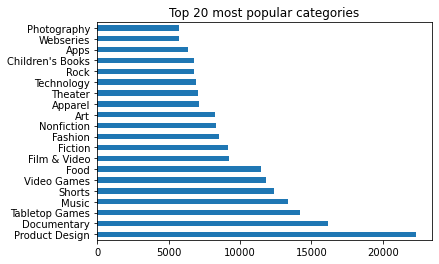

In [10]:
# Top 20 most popular categories
data['category'].value_counts()[:20].plot(kind='barh', title='Top 20 most popular categories')

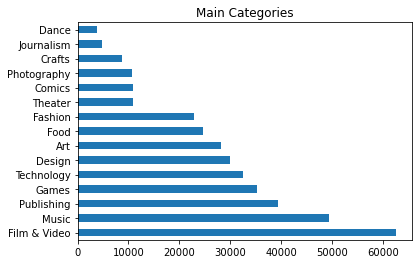

In [11]:
# Main Categories
data['main_category'].value_counts()[:20].plot(kind='barh', title='Main Categories')

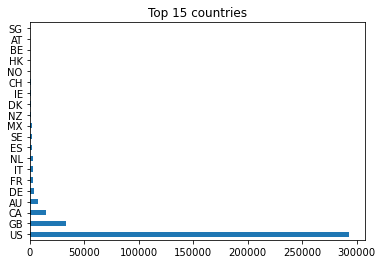

In [12]:
# Top 15 countries
data['country'].value_counts()[:20].plot(kind='barh', title='Top 15 countries')

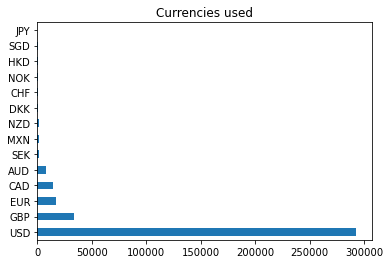

In [13]:
# Currencies used
data['currency'].value_counts()[:20].plot(kind='barh', title='Currencies used')

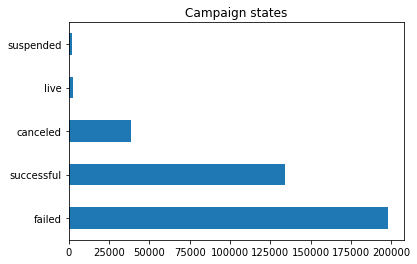

In [14]:
# Campaign states
data['state'].value_counts().plot(kind='barh', title='Campaign states')

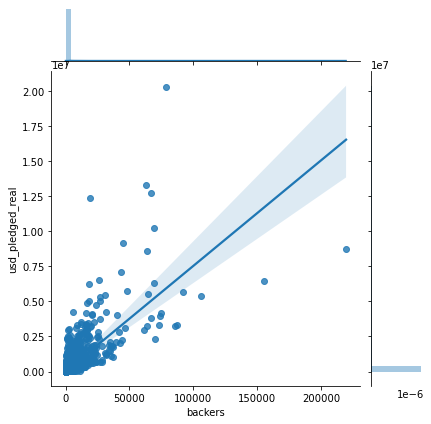

In [24]:
# Relationship with backers and usd pledged real data
sns.jointplot(x="backers", y="usd_pledged_real", data=data, kind="reg")


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression

In [75]:
X_train, X_test, y_train, y_test = train_test_split(data[['backers']], data['usd_pledged_real'], test_size=0.3, random_state=68)
# Notice that we use [['X']] and ['Y'] here. Any idea why?

# We sort the training set in order to keep the curve-form when we plot it on a graph using plt.plot()
X_train = X_train.sort_index()
y_train = y_train.sort_index()

In [76]:
# Step 2: Define a instance of PolynomialFeatures with degree=4 called 'poly_reg'
# Your code here
poly_reg = PolynomialFeatures(degree=4)

# Step 3: Fit and transform 'X_train', 'X_test' with the PolynomialFeatures and save the result in 'X_train_poly' and 'X_test_poly'
# Your code here
X_train_poly = poly_reg.fit_transform(X_train)
#ko nen xai fit_transform cho test do no xoa bo kq o tren
X_test_poly = poly_reg.transform(X_test)

# Step 4: Define a instance of LinearRegression called 'lm'
lm = LinearRegression()

# Step 5: Fitting the Linear Regression Model to the training set (X_train_poly)
# Your code here
lm.fit(X_train_poly, y_train)

# Step 6: Run predict() on the training set and save the result in 'y_train_predict' in order to plot your model
# Your code here
y_train_predict = lm.predict(X_train_poly)

# Step 7: Predict test set and save the result in 'y_test_predict'
# Your code here
y_test_predict = lm.predict(X_test_poly)

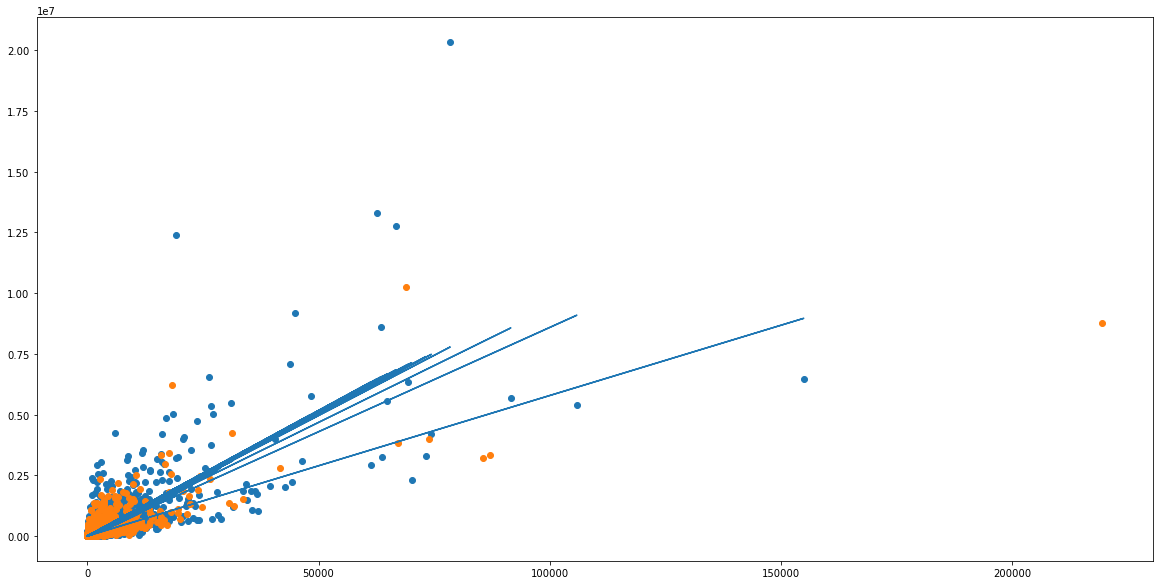

In [77]:
plt.figure(figsize=(20, 10))
plt.plot(X_train, y_train_predict)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.show()

In [79]:

print(lm.coef_)
print(lm.intercept_)

[ 0.00000000e+00  7.00806209e+01  1.37991617e-03 -1.63943961e-08
  4.50393896e-14]
1179.4781278757382
